In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

from google.colab import drive
drive.mount('/content/drive')

2.7.0
2.7.0


MessageError: ignored

In [ ]:
#Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#Check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jan 27 01:27:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download Kaggle Dataset

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=a227da0fba8ce9361f1db9955ad99cf5c08701d2c9747be24190a6a231ba560d
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir YOLO_Evaluate

In [ ]:
%cd sample_data

/content/sample_data


In [ ]:
# upload kaggle jason file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yifenglan","key":"88ca9a98eace740b3d0071335fee8840"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c petfinder-adoption-prediction -p pet_find --force

100% 1.94G/1.94G [00:50<00:00, 49.3MB/s]
100% 1.94G/1.94G [00:50<00:00, 40.9MB/s]


In [ ]:
%cd pet_find

/content/sample_data/pet_find


In [ ]:
!mkdir kaggle_data

In [ ]:
!unzip petfinder-adoption-prediction -d kaggle_data

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/train_sentiment/a89bfa0aa.json  
  inflating: kaggle_data/train_sentiment/a89d4e8f3.json  
  inflating: kaggle_data/train_sentiment/a89f8b241.json  
  inflating: kaggle_data/train_sentiment/a89fd1f1e.json  
  inflating: kaggle_data/train_sentiment/a8a1d4151.json  
  inflating: kaggle_data/train_sentiment/a8a2aecc3.json  
  inflating: kaggle_data/train_sentiment/a8a3c4f49.json  
  inflating: kaggle_data/train_sentiment/a8a8f95f6.json  
  inflating: kaggle_data/train_sentiment/a8b358af2.json  
  inflating: kaggle_data/train_sentiment/a8b9d57b4.json  
  inflating: kaggle_data/train_sentiment/a8ba4dfa1.json  
  inflating: kaggle_data/train_sentiment/a8c19a325.json  
  inflating: kaggle_data/train_sentiment/a8c336257.json  
  inflating: kaggle_data/train_sentiment/a8c555240.json  
  inflating: kaggle_data/train_sentiment/a8cdba660.json  
  inflating: kaggle_data/train_sentiment/a8ce7d647.json  
  inflating: kaggle_d

# Install YOLOv3 From Github

In [ ]:
#!git clone https://github.com/AntonMu/TrainYourOwnYOLO.git

In [ ]:
to_run = True 
if to_run:
  !git clone https://github.com/AntonMu/TrainYourOwnYOLO
  %cd TrainYourOwnYOLO
  !pip install -r requirements.txt
  to_run = False
  !wandb login

Cloning into 'TrainYourOwnYOLO'...
remote: Enumerating objects: 581, done.
remote: Total 581 (delta 0), reused 0 (delta 0), pack-reused 581
Receiving objects: 100% (581/581), 67.57 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (122/122), done.
/content/sample_data/pet_find/TrainYourOwnYOLO
     |████████████████████████████████| 320.4 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 57.7 MB/s 
     |████████████████████████████████| 156 kB 57.4 MB/s 
     |████████████████████████████████| 2.9 MB 55.0 MB/s 
     |████████████████████████████████| 459 kB 89.2 MB/s 
     |████████████████████████████████| 20.1 MB 72.0 MB/s 
     |████████████████████████████████| 180 kB 92.9 MB/s 
     |████████████████████████████████| 143 kB 93.1 MB/s 
     |████████████████████████████████| 97 kB 9.9 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 843 kB 71.0 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-a

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
#testing settings
!python Minimal_Example.py



| |                                      #          | 7533 Elapsed Time: 0:00:03
Downloaded Pretrained Weights in 5.9 seconds 

Detecting Cat Faces by calling: 

 python /content/sample_data/pet_find/TrainYourOwnYOLO/3_Inference/Detector.py --input_path /content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images --classes /content/sample_data/pet_find/TrainYourOwnYOLO/Data/Model_Weights/data_classes.txt --output /content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results --yolo_model /content/sample_data/pet_find/TrainYourOwnYOLO/Data/Model_Weights/trained_weights_final.h5 --box_file /content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/Detection_Results.csv --anchors /content/sample_data/pet_find/TrainYourOwnYOLO/2_Training/src/keras_yolo3/model_data/yolo_anchors.txt --file_types .jpg .jpeg .png  

2022-01-27 01:40:20.275038: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Ove

# Filter Cat images out

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import glob
from google.colab import files

In [ ]:
class preprocessing():

  def __init__(self, path):
    self.path = path
  
  def read_all_file(self):
    # if type_ != '.jpg' and type_ != '.png':
    #   raise Exception("Sorry, we need files of image in .jpg or .png")

    txtfiles = []
    address = self.path + '/*' + '.jpg'
    for file in glob.glob(address):
      txtfiles.append(file)
    return txtfiles
  

  def get_petID(self):
    '''
    Input (list of string): filename with format: e.g. For 0fa6ba30b-1.jpg, 0fa6ba30b is the pet ID,  '1' is the number of image of given pet.

    Output: (list of string): list of PetIDs(labels)    
    '''
    txtfiles = self.read_all_file()
    names = [x.split('/')[-1].split('-')[0] for x in txtfiles]
    return names


  def get_image_name(self):
    '''
    Input (list of string): filename with format: e.g. 0fa6ba30b-1.jpg

    Output: (list of string): list of PetIDs(labels)    
    '''
    txtfiles = self.read_all_file()
    image_path = [x.split('/')[-1].split('.')[0] for x in txtfiles]
    return image_path


  def load_image(self):
    img = tf.io.read_file(self.path)
    img_tensor = tf.image.decode_jpeg(img, channels= 3)
    return img_tensor

  def resize_normalize(self, img_size = 96):
    img = self.load_image()
    img = tf.image.resize(img, [img_size, img_size])
    img /= 255.0
    return img

In [ ]:
kaggle_path = "/content/sample_data/pet_find/kaggle_data/"

In [ ]:
def filter (dataset):
  a = preprocessing(kaggle_path+dataset+"_images")
  file_lst = a.read_all_file()
  df = pd.read_csv(kaggle_path+dataset+"/"+dataset+".csv")
  catid = df.loc[df["Type"] == 2]["PetID"].values
  for p in file_lst:
    if p.split("/")[-1].split("-")[0] in catid:
      img = Image.open(p,mode="r")
      img.save("/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/"+p.split("/")[-1])  

In [ ]:
filter("train")

In [ ]:
filter("test")

In [ ]:
#Check pic numbers
b = preprocessing("/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/")
file_lst_b = b.read_all_file()
print("Total pic number in Yolo folder to cut is: ",len(file_lst_b))

Total pic number in Yolo folder to cut is:  35528


# Train YOLO model

In [ ]:
%cd TrainYourOwnYOLO

[Errno 2] No such file or directory: 'TrainYourOwnYOLO'
/content/sample_data/pet_find/TrainYourOwnYOLO


In [ ]:
%cd 1_Image_Annotation

/content/sample_data/pet_find/TrainYourOwnYOLO/1_Image_Annotation


In [ ]:
! python Convert_to_YOLO_format.py

In [ ]:
%cd ../2_Training

/content/sample_data/pet_find/TrainYourOwnYOLO/2_Training


In [ ]:
!python Download_and_Convert_YOLO_weights.py



| |          #                                      | 7568 Elapsed Time: 0:00:01
Downloaded Raw yolov3.weights in 3.6 seconds

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2022-01-27 01:45:14.884527: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2

In [ ]:
! python Train_YOLO.py

2022-01-27 01:45:21.028103: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Create YOLOv3 model with 9 anchors and 1 classes.
Load weights /content/sample_data/pet_find/TrainYourOwnYOLO/2_Training/src/keras_yolo3/yolo.h5.
Freeze the first 249 layers of total 252 layers.
8888888888888888888*********************************98888888888888888888888888888888888
['/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/9k_%20(1).jpg 80,3,215,144,0\n', '/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/9k_%20(2).jpg 59,6,174,126,0\n', '/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/2Q__%20(1).jpg 27,15,107,87,0\n', '/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export/2Q

In [ ]:
%cd ../3_Inference

/content/sample_data/pet_find/TrainYourOwnYOLO/3_Inference


In [ ]:
#%cd /content/sample_data/pet_find/TrainYourOwnYOLO/3_Inference

In [ ]:
!python Detector.py
#"/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/" Total pic number in Yolo folder to cut is:  35528

Streaming output truncated to the last 5000 lines.
Cat_Face 0.64 (19, 3) (381, 400)
Time spent: 0.028sec
/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/fbb8a0267-3.jpg
(416, 416, 3)
Found 2 boxes for img
Cat_Face 0.25 (177, 89) (211, 183)
Cat_Face 0.26 (69, 166) (137, 298)
Time spent: 0.028sec
/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/c7aa43e1a-1.jpg
(416, 416, 3)
Found 0 boxes for img
Time spent: 0.026sec
/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/48c598ef0-17.jpg
(416, 416, 3)
Found 1 boxes for img
Cat_Face 0.84 (102, 89) (163, 194)
Time spent: 0.027sec
/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/3f936cb8a-5.jpg
(416, 416, 3)
Found 1 boxes for img
Cat_Face 1.00 (8, 0) (207, 208)
Time spent: 0.027sec
/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/5ba1b66b9-14.jpg
(416, 416, 3)
Found 3 boxes for img
Cat_Face 0.87 (146, 0)

## Outcomes

In [ ]:
df_cutinfo = pd.read_csv("/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/Detection_Results.csv")

In [ ]:
df_cutinfo

image  ... y_size
0      cf8e714b5-20.jpg  ...    480
1       c9cc0915c-2.jpg  ...    300
2       8c2aae63b-1.jpg  ...    400
3       fa773690e-3.jpg  ...    480
4       d9362f7f1-2.jpg  ...    400
...                 ...  ...    ...
36390   25b3328fd-1.jpg  ...    640
36391   25b3328fd-1.jpg  ...    640
36392   0907a14f3-4.jpg  ...    400
36393   8afeab374-4.jpg  ...    400
36394   62f87187d-1.jpg  ...    127

[36395 rows x 10 columns]

### Filter 

In [ ]:
df_count = df_cutinfo.groupby(by="image").count().copy()
df_only1 = df_count[df_count["image_path"] == 1].copy()
df_only1

image_path  ...  y_size
image                                                           ...        
0008c5398-1.jpg                                              1  ...       1
0008c5398-2.jpg                                              1  ...       1
0008c5398-3.jpg                                              1  ...       1
0008c5398-4.jpg                                              1  ...       1
0008c5398-5.jpg                                              1  ...       1
...                                                        ...  ...     ...
pug.jpg                                                      1  ...       1
puppy_1903313__340.jpg                                       1  ...       1
samoyed_puppy_dog_pictures.jpg                               1  ...       1
sei74187425.jpg                                              1  ...       1
single_minded_royalty_free_image_997141470_1558...           1  ...       1

[25712 rows x 9 columns]

In [ ]:
# Filter for only 1 catface per pic
df_count = df_cutinfo.groupby(by="image").count().copy()
df_only1 = df_count[df_count["image_path"] == 1].copy()
df_only1.reset_index(inplace=True)
only1 = df_only1["image"].values
df_cutinfo["image_filter"] = df_cutinfo["image"].apply(lambda x: 1 if x in only1 else 0)
df_oneface = df_cutinfo[(df_cutinfo["image_filter"] == 1)].copy()
df_oneface.reset_index(inplace=True)
df_oneface.drop(columns="index",inplace=True)

In [ ]:
# Filter for conf
df_conf = df_oneface[df_oneface["confidence"] > 0.6 ].copy()
df_conf.reset_index(inplace=True)
df_conf.drop(columns="index",inplace=True)
df_conf["id"] = df_conf["image"].apply(lambda x: x.split("-")[0])

In [ ]:
# Filter for pics per cat
df_count_id = df_conf.groupby(by="id").count().copy()
df_more1 = df_count_id[df_count_id["image_path"] > 2].copy()
df_more1.reset_index(inplace=True)
more1 = df_more1["id"].values
df_conf["id_filter"] = df_conf["id"].apply(lambda x: 1 if x in more1 else 0)
df_final = df_conf[(df_conf["id_filter"] == 1)].copy()
df_final.reset_index(inplace=True)
df_final.drop(columns="index",inplace=True)

In [ ]:
df_final

image  ... id_filter
0      cf8e714b5-20.jpg  ...         1
1       8c2aae63b-1.jpg  ...         1
2       fa773690e-3.jpg  ...         1
3       0901cae3e-5.jpg  ...         1
4       bba2fb084-1.jpg  ...         1
...                 ...  ...       ...
14062   6c2d4467e-1.jpg  ...         1
14063   c9efae474-7.jpg  ...         1
14064   0907a14f3-4.jpg  ...         1
14065   8afeab374-4.jpg  ...         1
14066   62f87187d-1.jpg  ...         1

[14067 rows x 13 columns]

In [ ]:
#Check only 1 face per pic
df_check_face = df_final.groupby("image").count().copy()
df_check_face[df_check_face["image_path"]!=1]

Empty DataFrame
Columns: [image_path, xmin, ymin, xmax, ymax, label, confidence, x_size, y_size, image_filter, id, id_filter]
Index: []

In [ ]:
#Check conf > 0.6
df_final[df_final["confidence"]<0.6]

Empty DataFrame
Columns: [image, image_path, xmin, ymin, xmax, ymax, label, confidence, x_size, y_size, image_filter, id, id_filter]
Index: []

In [ ]:
#Check >2 pics per id
df_check = df_final.groupby("id").count().copy()
df_check[df_check["image"]<=2]

Empty DataFrame
Columns: [image, image_path, xmin, ymin, xmax, ymax, label, confidence, x_size, y_size, image_filter, id_filter]
Index: []

In [ ]:
df_final.to_csv('/content/df_final.csv')
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/Face_Extraction
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/FaceVerification
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/FaceRecognition

cp: cannot stat '/content/df_final.pkl': No such file or directory
cp: cannot stat '/content/df_final.pkl': No such file or directory
cp: cannot stat '/content/df_final.pkl': No such file or directory


In [ ]:
df_final.to_pickle("/content/df_final.pkl") 
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/Face_Extraction
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/FaceVerification
!cp /content/df_final.pkl /content/drive/MyDrive/Petfinding/FaceRecognition

### Create random files for evaluation

In [ ]:
file_path = df_final["image_path"].tolist()

import random
random.seed(12)
rd_file_path = random.sample(file_path, 100)

In [ ]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow

for f in rd_file_path:
  img = Image.open(f,mode="r")
  img.save("/content/YOLO_Evaluate/"+f.split("/")[-1])

In [ ]:
!zip -r /content/eva.zip /content/YOLO_Evaluate

  adding: content/YOLO_Evaluate/ (stored 0%)
  adding: content/YOLO_Evaluate/dbe30d86f-14.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/be16e9744-14.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/4894fea5c-5.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/95e06e711-1.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/df72d8a20-1.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/4fd755cc6-3.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/8da3d6fc5-4.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/c3106dcd5-3.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/c14b2f3da-8.jpg (deflated 8%)
  adding: content/YOLO_Evaluate/c7315e345-4.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/4a91d273b-2.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/8913478c5-4.jpg (deflated 2%)
  adding: content/YOLO_Evaluate/6261c9966-4.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/968abd09a-1.jpg (deflated 1%)
  adding: content/YOLO_Evaluate/45e750d0d-9.jpg (deflated 2%)
  adding: content/YOLO_

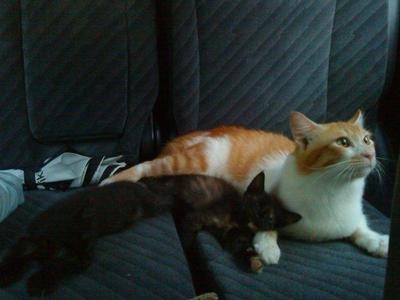

In [ ]:
img = Image.open("/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/d1ef3e54a-2.jpg",mode="r")
img

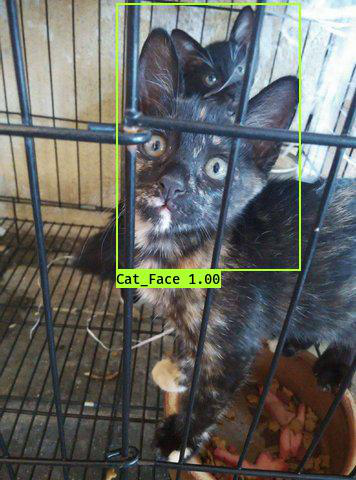

In [ ]:
img = Image.open("/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/40276ec6a-5_catface.jpg",mode="r")
img

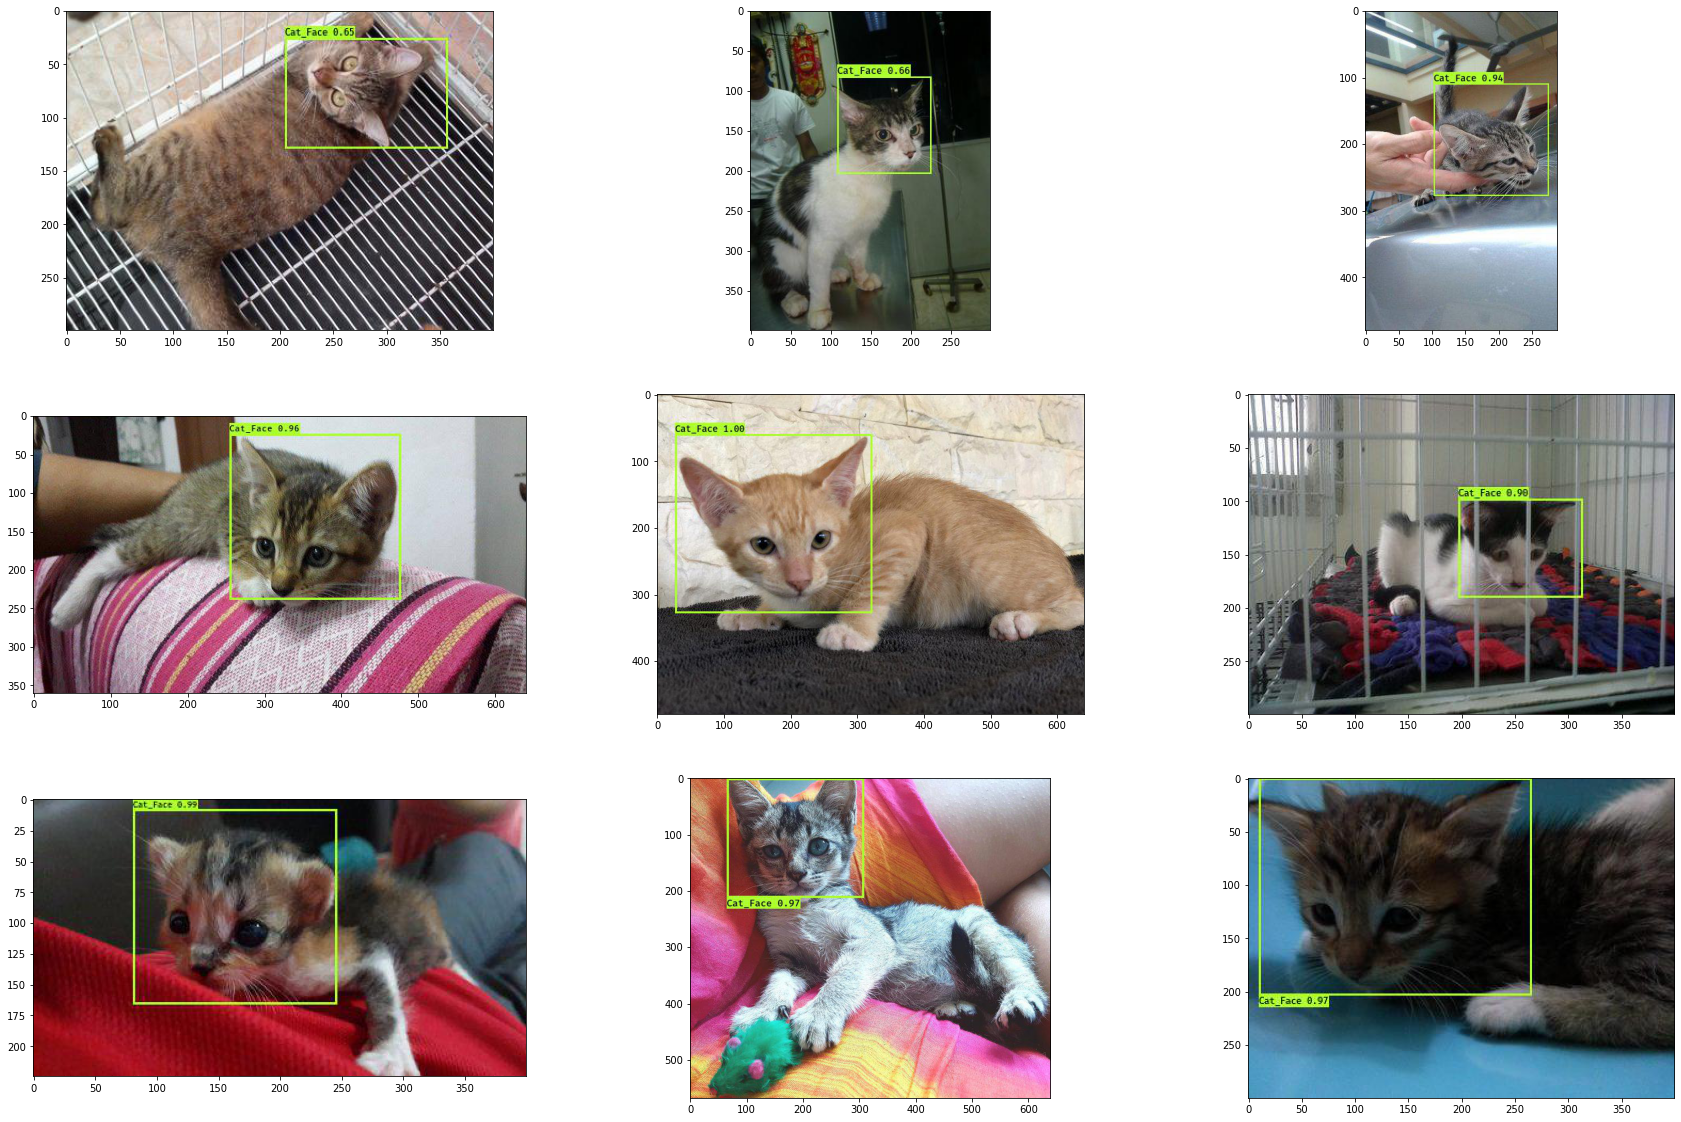

In [ ]:
# Random check
import matplotlib.pyplot as plt

rd_check_file_path = random.sample(file_path, 9)
rd_check_lst = []
for p in rd_check_file_path:
  p = p.split("/")[-1].split(".")[-2]
  p = "/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/"+p+"_catface.jpg"
  rd_check_lst.append(p)


fig,ax = plt.subplots(3,3,figsize=(30,20))
for i in range(9):
    with open(rd_check_lst[i],'rb') as f:
        image=Image.open(f)
        ax[i%3][i//3].imshow(image)
fig.show()

## Evaluation

### Download mAP Github Repo

In [ ]:
%cd ../../

/content/sample_data/pet_find


In [ ]:
!git clone https://github.com/rafaelpadilla/Object-Detection-Metrics.git

Cloning into 'Object-Detection-Metrics'...
remote: Enumerating objects: 554, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 554 (delta 28), reused 32 (delta 13), pack-reused 500
Receiving objects: 100% (554/554), 10.64 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (250/250), done.


In [ ]:
#Upload Ground Truth csv
from google.colab import files
files.upload()

Saving Annotations-export.csv to Annotations-export.csv


{'Annotations-export.csv': b'"image","xmin","ymin","xmax","ymax","label"\n"036af6df3-11.jpg",37.63712917181706,0,280.9718788627936,218.9205364497529,"Cat_Face"\n"036af6df3-12.jpg",147.92181705809642,95.6381280889621,256.94723423980224,188.40352141680395,"Cat_Face"\n"03a2876c0-1.jpg",87.94723252118644,26.39597297179666,257.15754104872883,202.4038725191504,"Cat_Face"\n"03a2876c0-4.jpg",72.0442002770936,62.98485376044568,218.3411522475369,223.49321030640667,"Cat_Face"\n"064d06815-3.jpg",44.70973186728395,60.87025591922005,146.90676118827162,178.87186629526462,"Cat_Face"\n"07af2a6b8-5.jpg",58.60284058179724,2.6114206128133706,189.67020089285714,129.23050139275767,"Cat_Face"\n"10ba7efac-24.jpg",275.2966625463535,27.164332784184516,524.7589616810877,256.58772652388797,"Cat_Face"\n"1377d2c0e-4.jpg",43.028494371482175,146.31267409470752,223.6792917448405,338.52367688022287,"Cat_Face"\n"163919bd1-1.jpg",180.15138185060061,4.796309192200558,366.432567332958,180.28159818941506,"Cat_Face"\n"1de2c7

In [ ]:
# Ground Truth csv
df_truth = pd.read_csv("Annotations-export.csv") #("Annotations-export.csv")
df_truth

df_final = pd.read_csv("/content/df_final.csv") #("Annotations-export.csv")
df_final

Unnamed: 0             image  ...         id  id_filter
0               0  cf8e714b5-20.jpg  ...  cf8e714b5          1
1               1   8c2aae63b-1.jpg  ...  8c2aae63b          1
2               2   fa773690e-3.jpg  ...  fa773690e          1
3               3   0901cae3e-5.jpg  ...  0901cae3e          1
4               4   bba2fb084-1.jpg  ...  bba2fb084          1
...           ...               ...  ...        ...        ...
14062       14062   6c2d4467e-1.jpg  ...  6c2d4467e          1
14063       14063   c9efae474-7.jpg  ...  c9efae474          1
14064       14064   0907a14f3-4.jpg  ...  0907a14f3          1
14065       14065   8afeab374-4.jpg  ...  8afeab374          1
14066       14066   62f87187d-1.jpg  ...  62f87187d          1

[14067 rows x 14 columns]

In [ ]:
df_eva = pd.DataFrame()
df_eva["image"] = df_truth["image"]
df_eva = df_eva.merge(df_final, how="inner",left_on="image",right_on="image")
df_eva

image  Unnamed: 0  ...         id  id_filter
0   036af6df3-11.jpg        8800  ...  036af6df3          1
1    03a2876c0-1.jpg         869  ...  03a2876c0          1
2    03a2876c0-4.jpg        6953  ...  03a2876c0          1
3    064d06815-3.jpg       13195  ...  064d06815          1
4    07af2a6b8-5.jpg        4226  ...  07af2a6b8          1
..               ...         ...  ...        ...        ...
89   d75065e01-3.jpg       13234  ...  d75065e01          1
90   de7731077-1.jpg        7447  ...  de7731077          1
91   e8e8a47fd-3.jpg        5115  ...  e8e8a47fd          1
92   ed4604a70-3.jpg         635  ...  ed4604a70          1
93   ffe2090b3-1.jpg       13509  ...  ffe2090b3          1

[94 rows x 14 columns]

In [ ]:
df_eva.to_csv('/content/df_eva.csv')
!cp /content/df_eva.csv /content/drive/MyDrive/Petfinding/Face_Extraction

In [ ]:
df_eva.isnull().sum().sum()

0

### Create ground truth txt

In [ ]:
df_truth["label"] = int(float(0))
df_eva["label"] = int(float(0))

In [ ]:
%cd /content/sample_data/pet_find/Object-Detection-Metrics
!rm -R groundtruths
!mkdir groundtruths

/content/sample_data/pet_find/Object-Detection-Metrics


In [ ]:
%cd /content/sample_data/pet_find/Object-Detection-Metrics
!rm -R detections
!mkdir detections

/content/sample_data/pet_find/Object-Detection-Metrics


In [ ]:
%cd /content/sample_data/pet_find

/content/sample_data/pet_find


In [ ]:
for index, row in df_truth.iterrows():
    f = open("Object-Detection-Metrics/groundtruths/"+row["image"].split(".")[0]+".txt","w")
    f.write(str(row["label"])+" "+str(row["xmin"])+" "+str(row["ymin"])+" "+str(row["xmax"])+" "+str(row["ymax"]))
    f.close()

### Create predicted files txt

In [ ]:
for index, row in df_eva.iterrows():
    f = open("Object-Detection-Metrics/detections/"+row["image"].split(".")[0]+".txt","w")
    f.write(str(row["label"])+" "+str(row["confidence"])+" "+str(row["xmin"])+" "+str(row["ymin"])+" "+str(row["xmax"])+" "+str(row["ymax"]))
    f.close()

### Compute mAP

In [ ]:
%cd Object-Detection-Metrics

/content/sample_data/pet_find/Object-Detection-Metrics


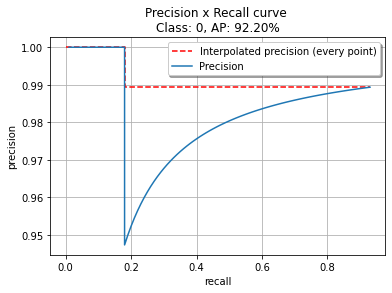

Average precision values per class:

0: 0.922021


In [ ]:
import _init_paths
import os.path
from BoundingBox import BoundingBox
from BoundingBoxes import BoundingBoxes
from Evaluator import *
from utils import *


def getBoundingBoxes():
    """Read txt files containing bounding boxes (ground truth and detections)."""
    allBoundingBoxes = BoundingBoxes()
    import glob
    import os
    # Read ground truths
    currentPath = "/content/sample_data/pet_find/Object-Detection-Metrics/"
    folderGT = os.path.join(currentPath, 'groundtruths')
    os.chdir(folderGT)
    files = glob.glob("*.txt")
    files.sort()
    # Class representing bounding boxes (ground truths and detections)
    allBoundingBoxes = BoundingBoxes()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box
    # (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt", "")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            idClass = splitLine[0]  # class
            x = float(splitLine[1])  # confidence
            y = float(splitLine[2])
            w = float(splitLine[3])
            h = float(splitLine[4])
            bb = BoundingBox(
                nameOfImage,
                idClass,
                x,
                y,
                w,
                h,
                CoordinatesType.Absolute, (200, 200),
                BBType.GroundTruth,
                format=BBFormat.XYWH)
            allBoundingBoxes.addBoundingBox(bb)
        fh1.close()
    # Read detections
    folderDet = os.path.join(currentPath, 'detections')
    os.chdir(folderDet)
    files = glob.glob("*.txt")
    files.sort()
    # Read detections from txt file
    # Each line of the files in the detections folder represents a detected bounding box.
    # Each value of each line is  "class_id, confidence, x, y, width, height" respectively
    # Class_id represents the class of the detected bounding box
    # Confidence represents confidence (from 0 to 1) that this detection belongs to the class_id.
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        # nameOfImage = f.replace("_det.txt","")
        nameOfImage = f.replace(".txt", "")
        # Read detections from txt file
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            idClass = splitLine[0]  # class
            confidence = float(splitLine[1])  # confidence
            x = float(splitLine[2])
            y = float(splitLine[3])
            w = float(splitLine[4])
            h = float(splitLine[5])
            bb = BoundingBox(
                nameOfImage,
                idClass,
                x,
                y,
                w,
                h,
                CoordinatesType.Absolute, (200, 200),
                BBType.Detected,
                confidence,
                format=BBFormat.XYWH)
            allBoundingBoxes.addBoundingBox(bb)
        fh1.close()
    return allBoundingBoxes


def createImages(dictGroundTruth, dictDetected):
    """Create representative images with bounding boxes."""
    import numpy as np
    import cv2
    # Define image size
    width = 200
    height = 200
    # Loop through the dictionary with ground truth detections
    for key in dictGroundTruth:
        image = np.zeros((height, width, 3), np.uint8)
        gt_boundingboxes = dictGroundTruth[key]
        image = gt_boundingboxes.drawAllBoundingBoxes(image)
        detection_boundingboxes = dictDetected[key]
        image = detection_boundingboxes.drawAllBoundingBoxes(image)
        # Show detection and its GT
        cv2.imshow(key, image)
        cv2.waitKey()


# Read txt files containing bounding boxes (ground truth and detections)
boundingboxes = getBoundingBoxes()
# Uncomment the line below to generate images based on the bounding boxes
# createImages(dictGroundTruth, dictDetected)
# Create an evaluator object in order to obtain the metrics
evaluator = Evaluator()
##############################################################
# VOC PASCAL Metrics
##############################################################
# Plot Precision x Recall curve
evaluator.PlotPrecisionRecallCurve(
    boundingboxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=0.5,  # IOU threshold
    #method=MethodAveragePrecision.ElevenPointInterpolation,  # As the official matlab code
    method=MethodAveragePrecision.EveryPointInterpolation,
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True)  # Plot the interpolated precision curve
# Get metrics with PASCAL VOC metrics
metricsPerClass = evaluator.GetPascalVOCMetrics(
    boundingboxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=0.5,  # IOU threshold
    #method=MethodAveragePrecision.ElevenPointInterpolation
    method=MethodAveragePrecision.EveryPointInterpolation
    )  # As the official matlab code
print("Average precision values per class:\n")
# Loop through classes to obtain their metrics
for mc in metricsPerClass:
    # Get metric values per each class
    c = mc['class']
    precision = mc['precision']
    recall = mc['recall']
    average_precision = mc['AP']
    ipre = mc['interpolated precision']
    irec = mc['interpolated recall']
    # Print AP per class
    print('%s: %f' % (c, average_precision))

when conf > 0.6, mAP@0.5 is 78%

In [ ]:
metricsPerClass = pd.DataFrame(metricsPerClass) 

In [ ]:
metricsPerClass.to_csv('/content/df_metricsPerClass.csv')
!cp /content/df_metricsPerClass.csv /content/drive/MyDrive/Petfinding/Face_Extraction

# PR Table

In [ ]:
df_eva = df_truth
df_eva = df_eva.merge(df_final, how="inner",left_on="image",right_on="image")
df_eva = df_eva.drop(columns=["Unnamed: 0","image_path", "image_filter", "id_filter", "id", "label_x", "x_size",	"y_size"], axis=1)
df_eva

image      xmin_x      ymin_x  ...  ymax_y  label_y  confidence
0   036af6df3-11.jpg   37.637129    0.000000  ...     259        0    0.976724
1    03a2876c0-1.jpg   87.947233   26.395973  ...     225        0    0.983279
2    03a2876c0-4.jpg   72.044200   62.984854  ...     274        0    0.914547
3    064d06815-3.jpg   44.709732   60.870256  ...     172        0    0.880194
4    07af2a6b8-5.jpg   58.602841    2.611421  ...     140        0    0.983149
..               ...         ...         ...  ...     ...      ...         ...
89   d75065e01-3.jpg   90.035924   62.136403  ...     160        0    0.746586
90   de7731077-1.jpg   72.619289  104.585219  ...     249        0    0.887525
91   e8e8a47fd-3.jpg   54.679774   27.341233  ...     171        0    0.973687
92   ed4604a70-3.jpg  149.821718   20.395195  ...     245        0    0.979108
93   ffe2090b3-1.jpg  283.396168   20.807249  ...     310        0    0.994620

[94 rows x 11 columns]

**Box of ground truth: (xmin_x,	ymin_x,	xmax_x,	ymax_x)**

**Box of predicted: (xmin_y,	ymin_y,	xmax_y,	ymax_y)**

In [ ]:
#boxesIntersect
IfIntersect = []
for i in range(len(df_eva["image"])):
  if df_eva["xmin_x"][i] > df_eva["xmax_y"][i]:
    # truebox is right of predictbox
    IfIntersect.append(False) 
  elif df_eva["xmin_y"][i] > df_eva["xmax_x"][i]:
    # truebox is left of predictbox
    IfIntersect.append(False) 
  elif df_eva["ymax_y"][i] < df_eva["ymin_x"][i]:
    # truebox is above predictbox
    IfIntersect.append(False) 
  elif df_eva["ymin_y"][i] > df_eva["ymax_x"][i]:
    # truebox is below predictbox
    IfIntersect.append(False) 
  else:
    IfIntersect.append(True) 

df_eva.insert(1, "IfIntersect", IfIntersect, True)

In [ ]:
#IntersectionArea
IntersectionArea = []
for i in range(len(df_eva["image"])):
  xA = max(df_eva["xmin_x"][i], df_eva["xmin_y"][i])
  yA = max(df_eva["ymin_x"][i], df_eva["ymin_y"][i])
  xB = min(df_eva["xmax_x"][i], df_eva["xmax_y"][i])
  yB = min(df_eva["ymax_x"][i], df_eva["ymax_y"][i])
  IntersectionArea.append((xB - xA + 1) * (yB - yA + 1))

df_eva.insert(1, "IntersectionArea", IntersectionArea, True)

In [ ]:
#UnionAreas
UnionAreas = []
for i in range(len(df_eva["image"])):
  area_A = (df_eva["xmax_x"][i] - df_eva["xmin_x"][i] + 1) * (df_eva["ymax_x"][i] - df_eva["ymin_x"][i] + 1)
  area_B = (df_eva["xmax_y"][i] - df_eva["xmin_y"][i] + 1) * (df_eva["ymax_y"][i] - df_eva["ymin_y"][i] + 1)
  UnionAreas.append(float(area_A + area_B - df_eva["IntersectionArea"][i]))
  
df_eva.insert(1, "UnionAreas", UnionAreas, True)

In [ ]:
#iou
iou = []
for i in range(len(df_eva["image"])):
  iou.append(df_eva["IntersectionArea"][i] / df_eva["UnionAreas"][i])

df_eva.insert(1, "iou", iou, True)

**The Precision x Recall curve is plotted by calculating the precision and recall values of the accumulated TP or FP detections.**

For this, first we need to order the detections by their confidences;

In [ ]:
#order the detections by their confidences
df_eva.sort_values(by=['confidence'], ascending=False, inplace=True)

then we calculate the precision and recall for each accumulated detection as shown in the table below:

(Note that for recall computation, the denominator term ("Acc TP + Acc FN" or "All ground truths") is constant at length of DF since GT boxes are constant irrespective of detections).

In [ ]:
TP = []
FP = []
AccTP = []
AccFP = []
Precision = []
Recall = []
result = []
threshold = 0.5

for i in range(len(df_eva["image"])):
  if df_eva["iou"][i] >= threshold:
    #True
    result.append(True)
    TP.append(1)
    FP.append(0)
  else:
    #False
    result.append(False)
    TP.append(0)
    FP.append(1)
  AccTP.append(sum(TP))
  AccFP.append(sum(FP))
  Precision.append(AccTP[i] / (AccTP[i] + AccFP[i]) )
  Recall.append(AccTP[i] / len(df_eva["image"]) )

df_eva.insert(1, "TP", TP, True)
df_eva.insert(1, "FP", FP, True)
df_eva.insert(1, "AccTP", AccTP, True)
df_eva.insert(1, "AccFP", AccFP, True)
df_eva.insert(1, "Precision", Precision, True)
df_eva.insert(1, "Recall", Recall, True)
df_eva.insert(1, "result", result, True)
df_eva

image  result    Recall  ...  ymax_y  label_y  confidence
8   1de2c7e27-1.jpg    True  0.010638  ...     235        0    0.998498
22  44fc199a9-1.jpg    True  0.021277  ...     265        0    0.998035
50  8c2aae63b-5.jpg    True  0.031915  ...     178        0    0.997748
21  45320bbe7-3.jpg    True  0.042553  ...     219        0    0.997690
56  975d32d75-3.jpg    True  0.053191  ...     184        0    0.996707
..              ...     ...       ...  ...     ...      ...         ...
89  d75065e01-3.jpg    True  0.957447  ...     160        0    0.746586
41  651d63dd7-4.jpg    True  0.968085  ...     209        0    0.743321
24  467694e77-9.jpg    True  0.978723  ...     307        0    0.729418
28  4e117f566-4.jpg    True  0.989362  ...     242        0    0.656237
69  b8d07c37b-2.jpg    True  1.000000  ...     225        0    0.614000

[94 rows x 22 columns]

In [ ]:
df_eva.to_csv("/content/PRtable.csv")
!cp /content/PRtable.csv /content/drive/MyDrive/Petfinding/Face_Extraction

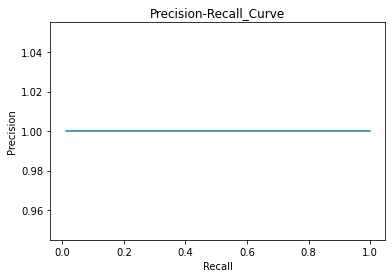

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_eva.Recall, df_eva.Precision)
plt.title('Precision-Recall_Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Save trained YOLO

In [ ]:
!zip -r /content/YOLOmodel_1212.zip /content/sample_data/pet_find/TrainYourOwnYOLO

Streaming output truncated to the last 5000 lines.
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/db3c2be5c-1_catface.jpg (deflated 1%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/8a464e436-3_catface.jpg (deflated 8%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/eec90de46-5_catface.jpg (deflated 2%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/6dcbe818e-3_catface.jpg (deflated 1%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/9affe6be5-1_catface.jpg (deflated 1%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_Results/1b71de34e-1_catface.jpg (deflated 1%)
  adding: content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Image_Detection_R

In [ ]:
!mv /content/YOLOmodel_1212.zip /content/drive/MyDrive/Petfinding/Face_Extraction

# Cut images

In [ ]:
!mkdir /content/CutByV3

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow

In [ ]:
# Cut image


img_lst = df_final["image"].values

for f in img_lst:
  fname = f
  path = "/content/sample_data/pet_find/TrainYourOwnYOLO/Data/Source_Images/Test_Images/"+fname
  img = Image.open(path,mode="r")

  xmin = int(df_final.loc[df_final["image"]==fname]["xmin"].values)
  ymin = int(df_final.loc[df_final["image"]==fname]["ymin"].values)
  xmax = int(df_final.loc[df_final["image"]==fname]["xmax"].values)
  ymax = int(df_final.loc[df_final["image"]==fname]["ymax"].values)

  img_new = img.crop((xmin,ymin,xmax,ymax))
  img_new.save("/content/CutByV3/"+fname)

### Check file number

In [ ]:
c = preprocessing("/content/CutByV3")
file_lst_final = c.read_all_file()
len(file_lst_final)

14067

In [ ]:
!zip -r /content/catface_conf06.zip /content/CutByV3/

Streaming output truncated to the last 5000 lines.
  adding: content/CutByV3/40f108d98-1.jpg (deflated 3%)
  adding: content/CutByV3/fb93de06f-3.jpg (deflated 2%)
  adding: content/CutByV3/98f5b7ecf-3.jpg (deflated 2%)
  adding: content/CutByV3/b751252cd-4.jpg (deflated 3%)
  adding: content/CutByV3/c4f05fe80-1.jpg (deflated 2%)
  adding: content/CutByV3/1a8fd6707-2.jpg (deflated 2%)
  adding: content/CutByV3/5ef34251f-4.jpg (deflated 1%)
  adding: content/CutByV3/a25a5ad9e-5.jpg (deflated 2%)
  adding: content/CutByV3/c2bb6a3be-3.jpg (deflated 2%)
  adding: content/CutByV3/e9a507001-2.jpg (deflated 3%)
  adding: content/CutByV3/c86c76857-3.jpg (deflated 1%)
  adding: content/CutByV3/95b5a7b19-2.jpg (deflated 3%)
  adding: content/CutByV3/fa773690e-5.jpg (deflated 2%)
  adding: content/CutByV3/9ab8c5dac-4.jpg (deflated 7%)
  adding: content/CutByV3/b751252cd-8.jpg (deflated 5%)
  adding: content/CutByV3/ce6fe7377-1.jpg (deflated 2%)
  adding: content/CutByV3/e4aadf23c-2.jpg (deflated 3

In [ ]:
!cp /content/catface_conf06.zip /content/drive/MyDrive/Petfinding/FaceRecognition

In [ ]:
!mv /content/catface_conf06.zip /content/drive/MyDrive/Petfinding/Face_Extraction